# Asterisc Technocrat

## Task 5 - Bitcoin Price Prediction

![Bitcoin Price](Bitcoin.jpg)



### Introduction

In this task, I've successfully implemented the concept of Time Series Forecasting for predicting the Bitcoin Prices using ARIMA (Auto-Regressive Integrated Moving Average) Model 

### Project Overflow
- 1. Importing the dependencies - The required libraries and modules are imported 
- 2. Data Collection - The data is web scraped using yfinance library, so we need to load it to a Pandas dataframe
- 3. Exploratory Data Analysis - The dataframe is analysed for any missing values or outliers. Additionally, the relationship and trend between the variables using visualizations. The seasonal test is also analysed.
- 4. Model Building - With the help of ACF and PACF Plots, we get the required parameters for training the ARIMA Model
- 5. Prediction & Visual Inspection - The model is then used to predict the next required days of Bitcoin Prices. The predicted values are then visually analyzed in order to get a better perspective of the predictions.

Now let us begin our project !

## 1. Importing the dependencies

The required libraries and tools are imported for working with the project

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import kaleido.scopes.plotly
import plotly.offline as pyo
from kaleido.scopes.plotly import PlotlyScope

## 2. Data Collection

The required data is web scraped using yfinance api and it is stored into a dataframe named 'df'

In [2]:
df = yf.download('BTC-USD')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


## 3. Exploratory Data Analysis

The loaded dataset is analysed for any missing values or any outliers. Additionally, some effective visualizations have been performed to get the understanding of the model.

In [3]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3224 entries, 2014-09-17 to 2023-07-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3224 non-null   float64
 1   High       3224 non-null   float64
 2   Low        3224 non-null   float64
 3   Close      3224 non-null   float64
 4   Adj Close  3224 non-null   float64
 5   Volume     3224 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 176.3 KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3224.000000,3224.000000,3224.000000,3224.000000,3224.000000,3.224000e+03
mean,13644.261923,13977.485970,13280.243034,13652.178623,13652.178623,1.657473e+10
std,16017.396953,16418.255839,15560.392060,16015.223675,16015.223675,1.950148e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,758.426224,772.986771,745.941513,762.510757,762.510757,1.303335e+08
50%,7678.343994,7892.110107,7503.479980,7679.966797,7679.966797,1.019161e+10
75%,20229.587402,20694.111816,19829.653320,20265.173340,20265.173340,2.744515e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [6]:
df.reset_index(inplace = True)

In [7]:
df['Date'].dtype

dtype('<M8[ns]')

**Visualizations**

Text(0.5, 1.0, 'Bitcoin Price Distribution')

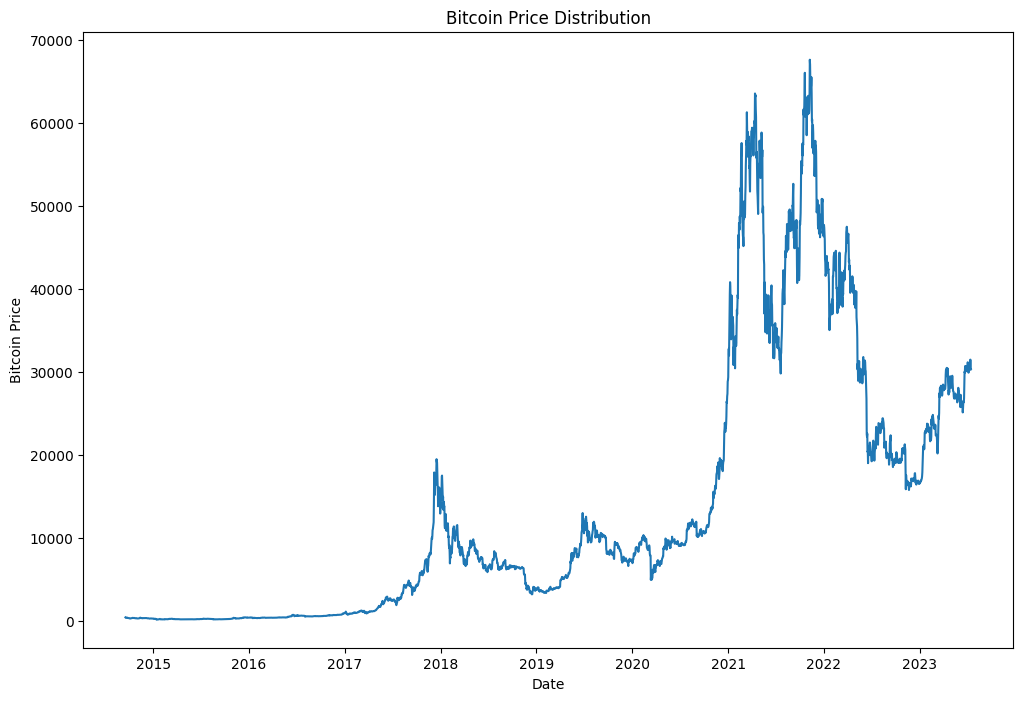

In [8]:
plt.figure(figsize = (12,8))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.title('Bitcoin Price Distribution')

Text(0.5, 1.0, 'Bitcoin Price Distribution')

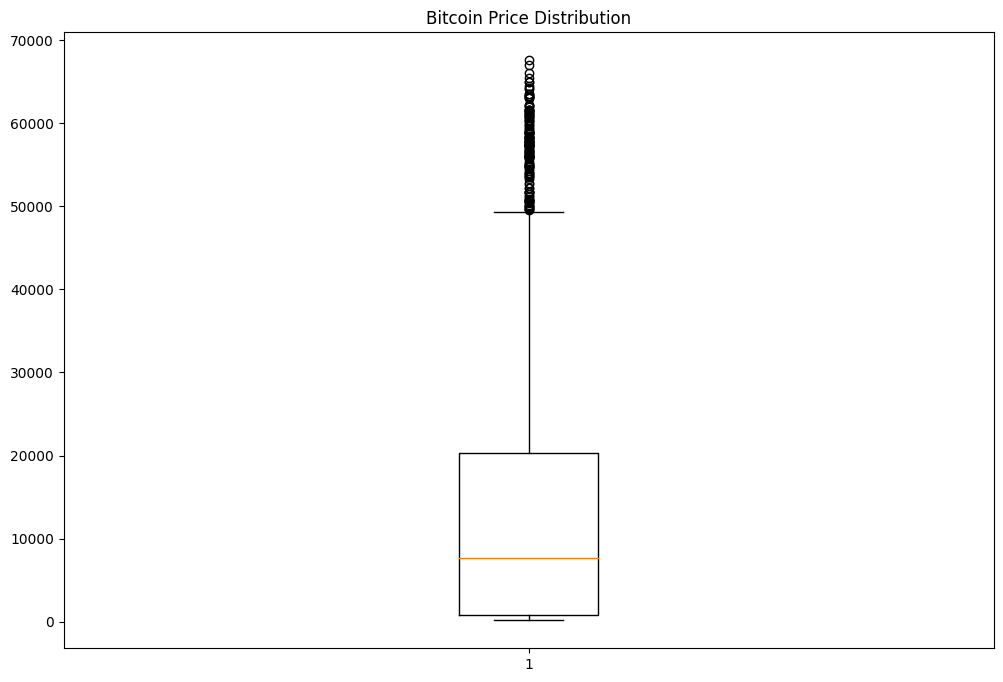

In [9]:
plt.figure(figsize = (12,8))
plt.boxplot(df['Close'])
plt.title('Bitcoin Price Distribution')

In [10]:
df['Day'] = df['Date'].dt.day_name()

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,Wednesday
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,Thursday
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,Friday
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,Saturday
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,Sunday
...,...,...,...,...,...,...,...,...
3219,2023-07-11,30417.632812,30788.314453,30358.097656,30620.951172,30620.951172,12151839152,Tuesday
3220,2023-07-12,30622.246094,30959.964844,30228.835938,30391.646484,30391.646484,14805659717,Wednesday
3221,2023-07-13,30387.488281,31814.515625,30268.351562,31476.048828,31476.048828,23686079548,Thursday
3222,2023-07-14,31474.720703,31582.253906,29966.386719,30334.068359,30334.068359,20917902660,Friday


In [12]:
data = df.drop(columns = ['Open', 'High', 'Low', 'Adj Close', 'Volume'])

In [13]:
data.tail()

,Date,Close,Day
3219,2023-07-11,30620.951172,Tuesday
3220,2023-07-12,30391.646484,Wednesday
3221,2023-07-13,31476.048828,Thursday
3222,2023-07-14,30334.068359,Friday
3223,2023-07-15,30311.033203,Saturday


In [14]:
day_stats = data.groupby('Day')['Close'].agg(['mean', 'median', 'std']).reset_index()

In [15]:
fig = go.Figure()

fig.add_trace(go.Bar(x = day_stats['Day'], y = day_stats['mean'], name = 'Mean'))
fig.add_trace(go.Bar(x = day_stats['Day'], y = day_stats['median'], name = 'Median'))
fig.add_trace(go.Bar(x = day_stats['Day'], y = day_stats['std'], name = 'Standard Deviation'))
fig.update_layout(title = 'Bitcoin Price Analysis Day wise', xaxis_title = 'Day', yaxis_title = 'Bitcoin Price')
# fig.show()
# Set the mathjax configuration to None
kaleido_scope = kaleido.scopes.plotly.PlotlyScope(mathjax=None)

# Save the plot as an image
pio.write_image(fig, "stats.png", engine = "kaleido")

![Plot](stats.png)

Let's analyze the trends and seasonal patterns of the Instagram reach

In [16]:
from plotly.tools import mpl_to_plotly
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


result = seasonal_decompose(data['Close'], 
                            model='multiplicative', 
                            period=100)

fig = plt.figure()
fig = result.plot()

fig = mpl_to_plotly(fig)
# Set the mathjax configuration to None
kaleido_scope = kaleido.scopes.plotly.PlotlyScope(mathjax=None)

# Save the plot as an image
pio.write_image(fig, "diag.png", engine = "kaleido")

<Figure size 640x480 with 0 Axes>

![Plot](diag.png)

It shows seasonal pattern, so we can use ARIMA model to predict the reach of the Instagram account. We need to find the values of p,d and q, in order to do so.

To find the value of p, we can use partial autocorrelation plot and to find q we can use autocorrelation plot

#### Autocorrelation and Partial Autocorrelation
- Identification of an AR model is often best done with the PACF.
   - For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
- Identification of an MA model is often best done with the ACF rather than the PACF.
  - For an MA model, the theoretical ACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
  
p = AR model lags 
d = differencing 
q = MA lags

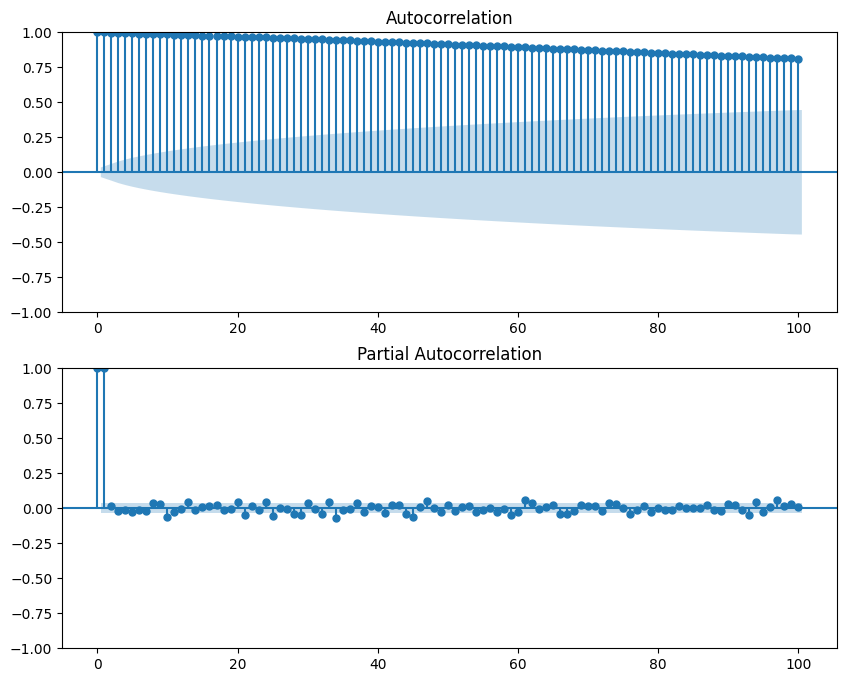

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(211)
plot_acf(data['Close'], lags=100, ax=ax1)

ax2 = fig.add_subplot(212)
plot_pacf(data['Close'], lags=100, ax=ax2)

plt.show()

## 4. Model Training


## Introduction to ARIMA Model

The ARIMA model is a popular time series forecasting technique that combines three key components: autoregression (AR), differencing (I), and moving average (MA). It is a powerful tool for analyzing and predicting time series data.

### Autoregression (AR)

The autoregressive component of ARIMA, denoted by AR(p), captures the relationship between an observation and a certain number of lagged observations (i.e., previous values of the time series). The order of autoregression, denoted by 'p', determines the number of lagged observations considered. It helps to identify the underlying patterns and dependencies in the data.

### Differencing (I)

The differencing component of ARIMA, denoted by I(d), is used to remove the trend or seasonality present in the time series data. It involves subtracting the current observation from a lagged observation at a specific time interval. The order of differencing, denoted by 'd', determines the number of differencing steps required to make the series stationary.

### Moving Average (MA)

The moving average component of ARIMA, denoted by MA(q), considers the dependency between an observation and a residual error from a moving average model applied to lagged observations. The order of the moving average, denoted by 'q', determines the number of lagged forecast errors considered.

### ARIMA Notation

The ARIMA model is denoted as ARIMA(p, d, q), where:
- 'p' represents the order of the autoregressive component (AR).
- 'd' represents the order of differencing (I).
- 'q' represents the order of the moving average component (MA).

### Applying ARIMA Model

To apply the ARIMA model, follow these steps:
1. Visualize the time series data to identify any trends, seasonality, or irregular patterns.
2. Determine the order of differencing required to make the series stationary.
3. Identify the appropriate order of autoregression (AR) and moving average (MA) based on the autocorrelation and partial autocorrelation plots.
4. Fit the ARIMA model to the differenced time series data.
5. Validate the model by analyzing the residuals and performing statistical tests.
6. Use the fitted model for forecasting future values.

In [18]:
p, d, q = 3, 1, 1
from statsmodels.tsa.arima.model import ARIMA
model_a = ARIMA(data['Close'], order=(p, d, q))
model_a = model_a.fit()
print(model_a.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3224
Model:                 ARIMA(3, 1, 1)   Log Likelihood              -26056.995
Date:                Sat, 15 Jul 2023   AIC                          52123.989
Time:                        20:48:34   BIC                          52154.379
Sample:                             0   HQIC                         52134.881
                               - 3224                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6010      0.149      4.042      0.000       0.310       0.892
ar.L2          0.0253      0.011      2.372      0.018       0.004       0.046
ar.L3          0.0213      0.011      1.864      0.0

## 5. Prediction and Visual Inspection

Now, the trained ARIMA model is utilized for predicting the next 100 values. And then they are visualized along with the original dataset to compare the reach accuracy and continuity.

In [22]:
pred = model_a.predict(len(data) - 50, len(data) + 100)
fig = go.Figure()
fig.add_trace(go.Scatter(x = data.index, y = data['Close'], mode = 'lines', name = 'Bitcoin Actual Prices'))
fig.add_trace(go.Scatter(x = pred.index, y = pred, mode = 'lines', name = 'Bitcoin Predictions'))
fig.update_layout(title = 'Bitcoin Actual Values vs Predictions', xaxis_title = 'Date', yaxis_title = 'Closing Price')
# fig.show()
# Set the mathjax configuration to None
kaleido_scope = kaleido.scopes.plotly.PlotlyScope(mathjax=None)

# Save the plot as an image
pio.write_image(fig, "pred1.png", engine = "kaleido")

![Plot](pred1.png)